In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
import platform

%load_ext autoreload
%autoreload 2

In [7]:
import os
def list_txt_files():
    txt_files = []
    for f in os.listdir("../ruby_txt/"):
        if f.endswith("_1.txt"):
            full_file = os.path.abspath(os.path.join("../ruby_txt/", f))
            txt_files.append(full_file)
    print("\n".join(txt_files))
    return txt_files

txt_files = list_txt_files()

fname = txt_files[1]
print(f"selected = {fname}")

/home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_062011_1.txt
/home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_072749_1.txt
selected = /home/dg/GitHubUbuntU/gps_data_with_python/ruby_txt/runPositions_20230730_072749_1.txt


In [8]:
import json
# Function to read JSON data from a file and parse it into a Python object
def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        return data

# Call the function to read the JSON data
pos_data = read_json_file(fname)

In [9]:
import numpy as np
from geo_funcs import calc_geodesic

def get_s_geo_len_kmh_vectors(pos_data):
    s_geo_len_arr = []
    kmh_arr = []
    for i in range(1, len(pos_data)):
        if (i > 1):
            p1 = pos_data[i - 1]
            p2 = pos_data[i]
            result = calc_geodesic(p1, p2, False)
            s_geo_len_arr.append(result['s_geo_len'])
            kmh_arr.append(result['kmh'])
    return np.array(s_geo_len_arr), np.array(kmh_arr)

# Assuming 'pos_data' is a list containing the position data as described in your previous message
# Call the function to get the s_geo_len and kmh vectors as NumPy arrays
s_geo_len, kmh = get_s_geo_len_kmh_vectors(pos_data)

In [10]:
print(len(s_geo_len), len(kmh))

4148 4148


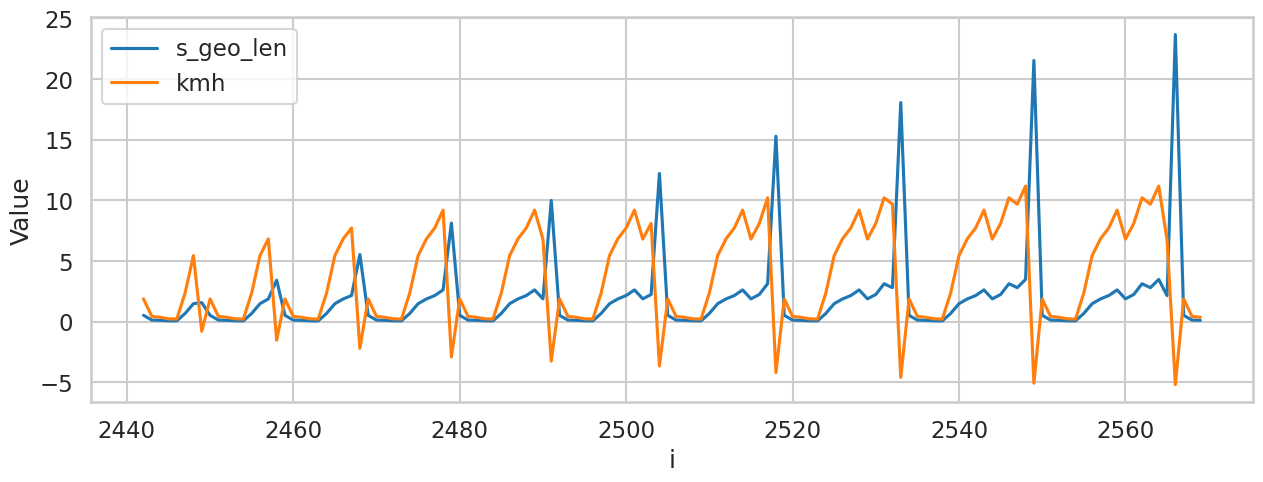

In [24]:
# Now you can use 's_geo_len' and 'kmh' for plotting using any plotting library like Matplotlib
# For example:
import matplotlib.pyplot as plt

# Assuming 'i_values' contains the corresponding values of 'i' (e.g., [2, 3])
fr = 2442
to = min(2570, len(s_geo_len))
i_values = list(range(fr, to))

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(i_values, s_geo_len[fr:to], label='s_geo_len')
plt.plot(i_values, kmh[fr:to], label='kmh')
plt.xlabel('i')
plt.ylabel('Value')
plt.legend()
plt.show()

In [25]:
j = 0
loa = []
for i in range(2442, 2570):
    print(f"{i:-3d},{j:-2d},{s_geo_len[i]:6.4f}")
    j = j+1
    if (s_geo_len[i]>1.5):
        loa.append(j)
        print(f"{i},{j}")
        j = 0

2442, 0,0.5113
2443, 1,0.1166
2444, 2,0.1006
2445, 3,0.0611
2446, 4,0.0562
2447, 5,0.6672
2448, 6,1.4708
2449, 7,1.5589
2449,8
2450, 0,0.5113
2451, 1,0.1166
2452, 2,0.1006
2453, 3,0.0611
2454, 4,0.0562
2455, 5,0.6672
2456, 6,1.4708
2457, 7,1.8610
2457,8
2458, 0,3.4046
2458,1
2459, 0,0.5113
2460, 1,0.1166
2461, 2,0.1006
2462, 3,0.0611
2463, 4,0.0562
2464, 5,0.6672
2465, 6,1.4708
2466, 7,1.8610
2466,8
2467, 0,2.1415
2467,1
2468, 0,5.5216
2468,1
2469, 0,0.5113
2470, 1,0.1166
2471, 2,0.1006
2472, 3,0.0611
2473, 4,0.0562
2474, 5,0.6672
2475, 6,1.4708
2476, 7,1.8610
2476,8
2477, 0,2.1415
2477,1
2478, 0,2.6067
2478,1
2479, 0,8.1156
2479,1
2480, 0,0.5113
2481, 1,0.1166
2482, 2,0.1006
2483, 3,0.0611
2484, 4,0.0562
2485, 5,0.6672
2486, 6,1.4708
2487, 7,1.8610
2487,8
2488, 0,2.1415
2488,1
2489, 0,2.6067
2489,1
2490, 0,1.8688
2490,1
2491, 0,9.9789
2491,1
2492, 0,0.5113
2493, 1,0.1166
2494, 2,0.1006
2495, 3,0.0611
2496, 4,0.0562
2497, 5,0.6672
2498, 6,1.4708
2499, 7,1.8610
2499,8
2500, 0,2.1415
250